In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

# Read The Dataset

In [2]:
# Read the data
data_path = 'CC_GENERAL.csv'
raw_df = pd.read_csv(data_path)
print('The shape of the dataset is:', raw_df.shape)

The shape of the dataset is: (8950, 18)


# Data Investigation

In [3]:
# Let's see the data types and non-null values for each column
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
# Count number of null values
raw_df.isnull().sum(axis=0).sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [21]:
# Basic statistics for numerical columns
raw_df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [22]:
raw_df.duplicated().sum()

0

In [3]:
raw_df.drop(columns='CUST_ID', inplace=True)

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

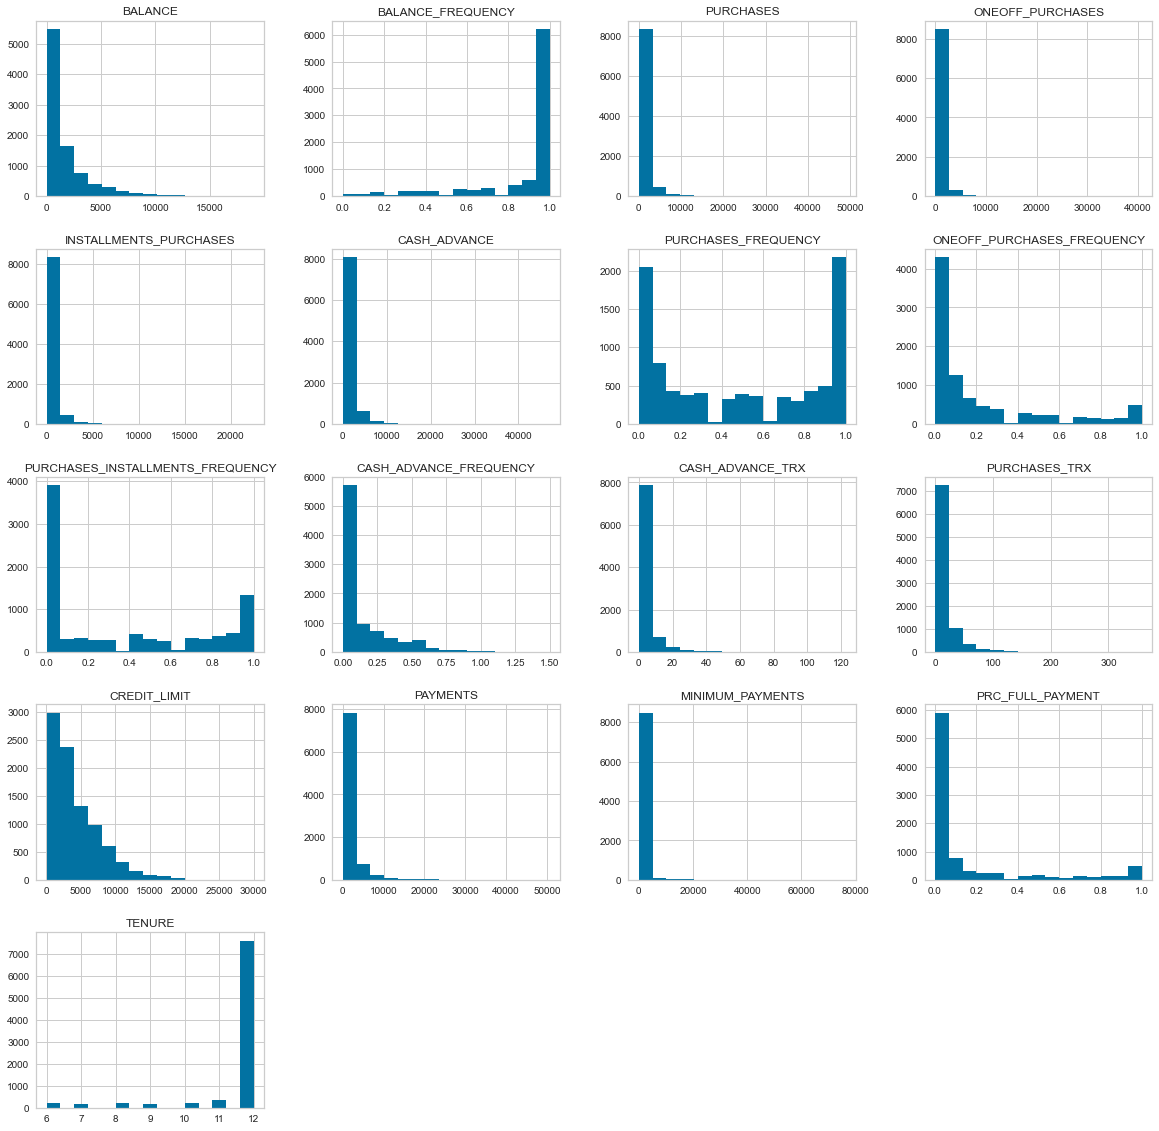

In [24]:
raw_df.hist(figsize=(20, 20), grid=True, bins=15)

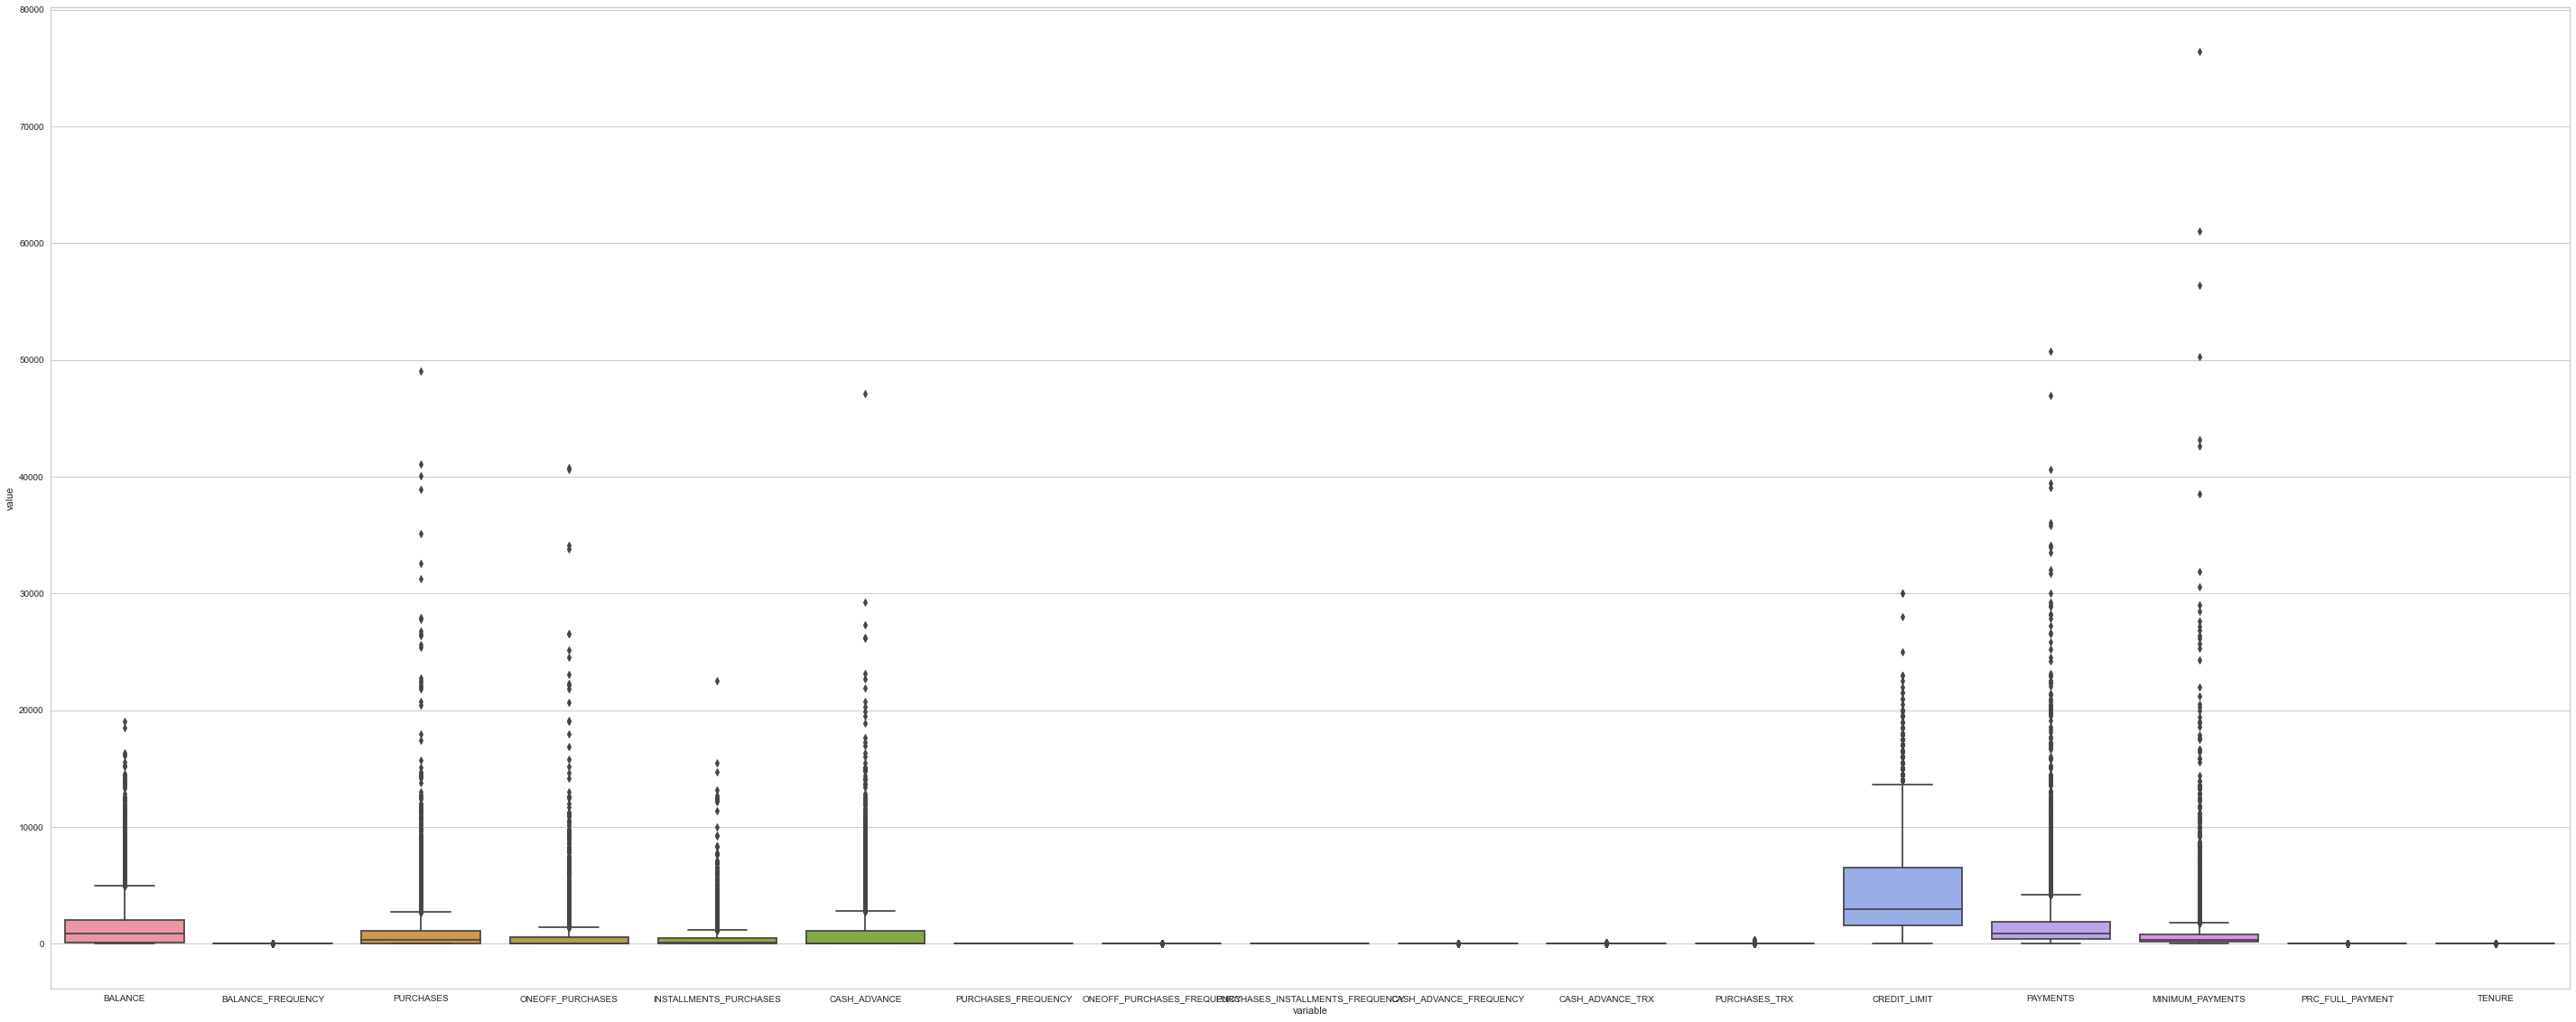

In [25]:
plt.figure(figsize=(50,20))
sns.boxplot(x="variable", y="value", data=pd.melt(raw_df))
plt.show()

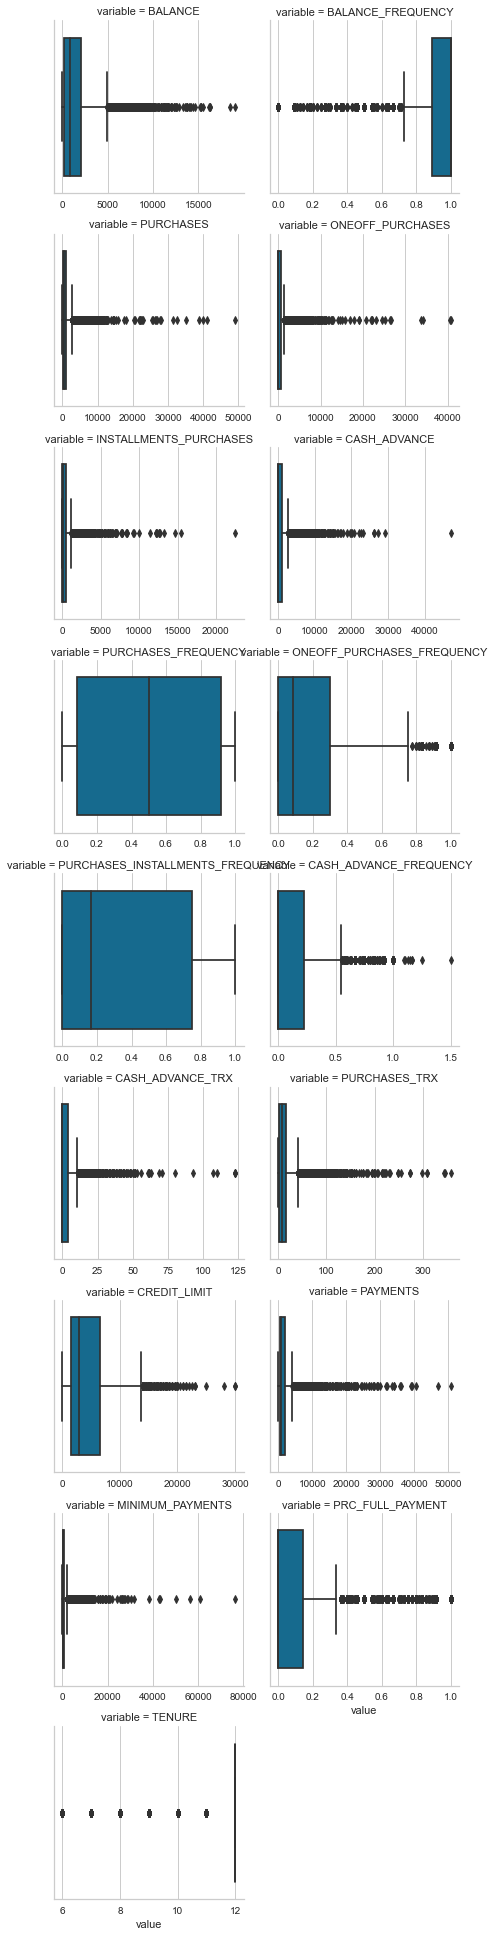

In [26]:
f = pd.melt(raw_df, value_vars=raw_df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.boxplot, "value")

<AxesSubplot:>

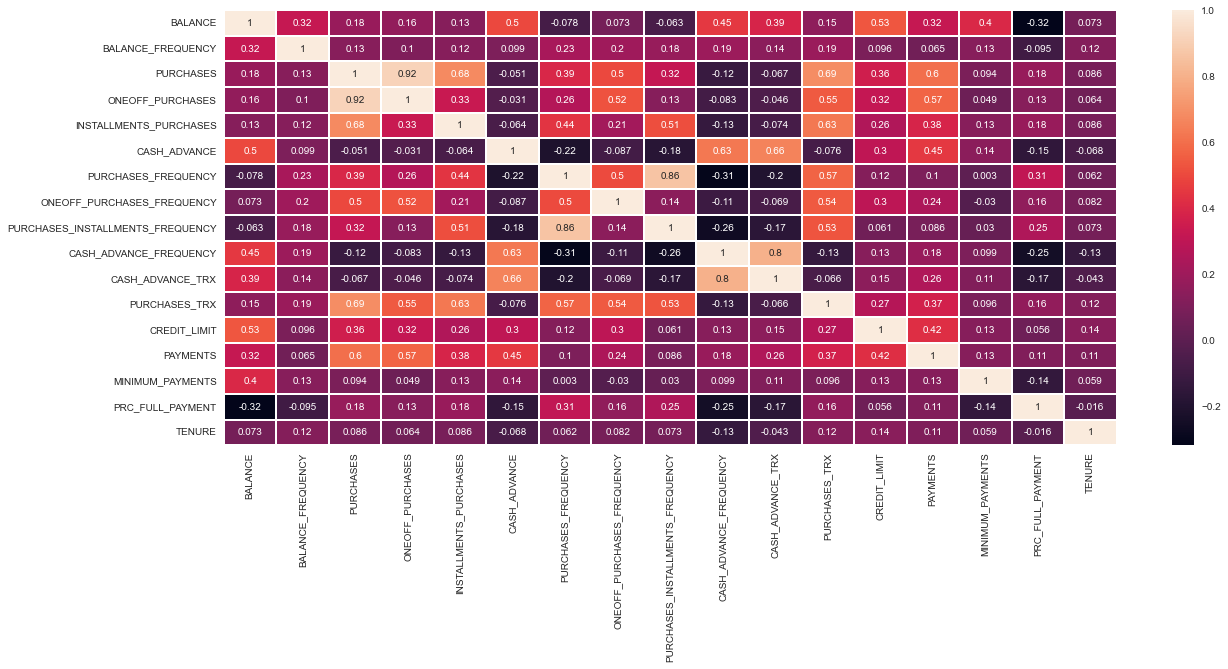

In [27]:
plt.figure(figsize = (20, 8))
sns.heatmap(raw_df.corr(), annot=True, linewidths=0.1)

In [4]:
df_copy = raw_df.copy()

**Drop Null Values**

In [5]:
df_copy.dropna(inplace=True)
df_copy.isnull().sum(axis=0).head()
df_copy.reset_index(inplace=True)

**Log Transformation**

In [6]:
df_logged = np.log1p(df_copy)

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>],
       [<AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>],
       [<AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>],
       [<AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}

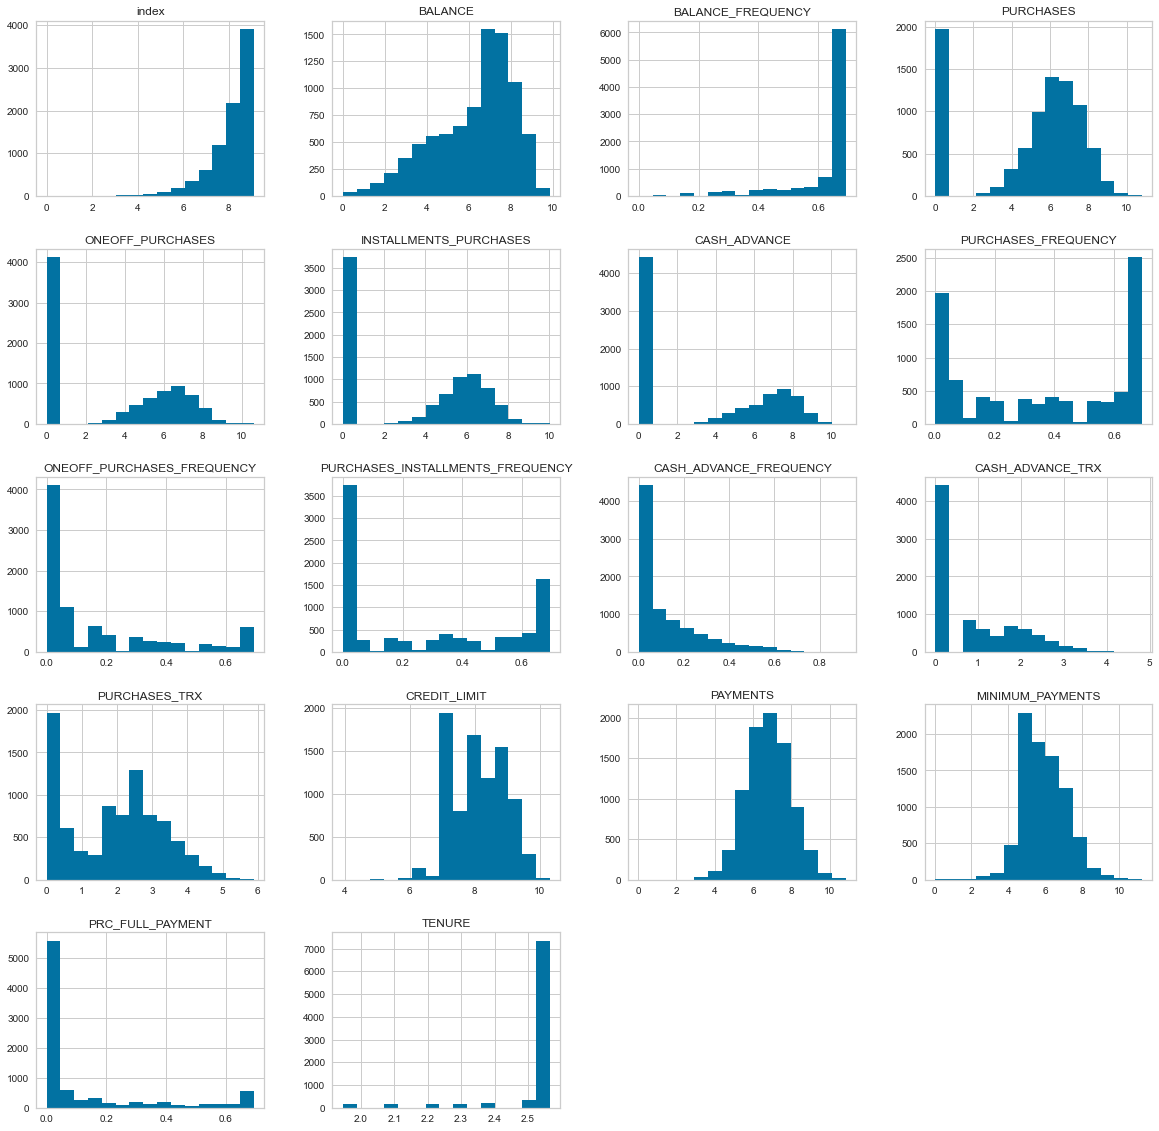

In [31]:
df_logged.hist(figsize=(20, 20), grid=True, bins=15)

In [7]:
tsne = TSNE(n_components=2,
            perplexity=30, 
            learning_rate=10, 
            init='pca', 
            method='barnes_hut', 
            n_jobs=-1, 
            n_iter=10**3, 
            random_state=42).fit_transform(df_logged)

**PCA**

In [9]:
pca = PCA(n_components=9)
df_logged_pca = pca.fit_transform(df_logged)

**Expectation Maximization (EM)**

In [29]:
gm = GaussianMixture(n_components=7).fit_predict(df_logged_pca)

In [30]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = gm
print(tsne_projection['cluster'].value_counts())
# tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

0    1962
1    1741
3    1686
5    1010
6    1004
4     778
2     455
Name: cluster, dtype: int64


**DBScan**

In [21]:
db2 = DBSCAN(eps=2.1, min_samples=5, metric='euclidean').fit(df_logged_pca)
labels = db2.labels_
silhouette_score(df_logged_pca, labels)

0.4515616579281619

In [22]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = labels
print(tsne_projection['cluster'].value_counts())
tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

 0    1952
 1    1701
 4    1661
 2     978
 5     961
 3     739
 6     429
-1     215
Name: cluster, dtype: int64


**Isolated Random Forest (IRF)**

In [27]:
irf = IsolationForest().fit_predict(df_logged_pca)

array([-1, -1, -1, ...,  1, -1, -1])

In [28]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = irf
print(tsne_projection['cluster'].value_counts())
tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

 1    7705
-1     931
Name: cluster, dtype: int64


**Robust Scaling**

In [47]:
df_RS = RobustScaler().fit_transform(df_copy)

In [9]:
tsne = TSNE(n_components=2,
            perplexity=30, 
            learning_rate=10, 
            init='pca', 
            method='barnes_hut', 
            n_jobs=-1, 
            n_iter=10**3, 
            random_state=42).fit_transform(df_RS)

**PCA**

In [10]:
pca = PCA()
df_RS_pca = pca.fit_transform(df_RS)

In [11]:
px.line(x=np.arange(1, len(df_copy.columns)+1), y=np.cumsum(pca.explained_variance_ratio_), markers='o')

In [28]:
pca = PCA(n_components=11)
df_RS_pca = pca.fit_transform(df_RS)

**Expectation Maximization (EM)**

In [39]:
gm = GaussianMixture(n_components=2).fit_predict(df_RS_pca)

In [40]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = gm
print(tsne_projection['cluster'].value_counts())
# tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

0    5951
1    2685
Name: cluster, dtype: int64


**DBScan**

In [31]:
knn = NearestNeighbors()
knn.fit(df_RS_pca)
distances, neighbors = knn.kneighbors(df_RS_pca)
distances = np.sort(distances[:, -1], axis=0)

In [32]:
px.line(x=np.arange(len(distances)), y=distances)

In [33]:
db2 = DBSCAN(eps=7.3, min_samples=5, metric='euclidean').fit(df_RS_pca)
labels = db2.labels_
silhouette_score(df_RS_pca, labels)

0.8118596628392059

In [34]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = labels
print(tsne_projection['cluster'].value_counts())
tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

 0    8563
-1      73
Name: cluster, dtype: int64


**Isolated Random Forest (IRF)**

In [41]:
irf = IsolationForest().fit_predict(df_RS_pca)

In [42]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = irf
print(tsne_projection['cluster'].value_counts())
tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

 1    8106
-1     530
Name: cluster, dtype: int64
